### 1. Implement BPE Algorithm

In [121]:
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict

nltk.download('punkt')
from nltk.corpus import gutenberg

def bpe_algorithm(tokens, num_merges=1000):
    vocab = {}
    for token in tokens:
        token = ' '.join(list(token))  # Split each word into characters
        vocab[token] = vocab.get(token, 0) + 1

    merges = []
    for i in range(num_merges):
        pairs = {}
        for word in vocab:
            symbols = word.split()
            for j in range(len(symbols) - 1):
                pair = (symbols[j], symbols[j + 1])
                pairs[pair] = pairs.get(pair, 0) + vocab[word]

        if not pairs:
            break
        
        best_pair = max(pairs, key=pairs.get)
        merges.append(best_pair)

        bigram = ' '.join(best_pair)
        replacement = ''.join(best_pair)
        new_vocab = {}
        for word in vocab:
            new_word = word.replace(bigram, replacement)
            new_vocab[new_word] = vocab[word]
        vocab = new_vocab

    return merges, vocab


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaishnavibhutada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. Train on NLTK Dataset

In [124]:
training_books = ['austen-emma.txt', 'shakespeare-hamlet.txt', 'melville-moby_dick.txt']
training_text = ' '.join([gutenberg.raw(book) for book in training_books])

train_tokens = training_text.split()

# Apply BPE to training data
merges, vocab = bpe_algorithm(train_tokens, num_merges=1000)


### 3 . Test on NLTK Dataset (3 marks)

In [126]:
testing_books = ['bible-kjv.txt', 'blake-poems.txt', 'whitman-leaves.txt']
testing_text = ' '.join([gutenberg.raw(book) for book in testing_books])

punkt_tokens = word_tokenize(testing_text)

def apply_bpe_to_test_data(test_tokens, merges):
    for merge in merges:
        old_pair = ' '.join(merge)
        new_pair = ''.join(merge)
        test_tokens = [token.replace(old_pair, new_pair) for token in test_tokens]
    return test_tokens

bpe_test_tokens = apply_bpe_to_test_data(testing_text.split(), merges)

bpe_test_tokens = [token.lower().strip() for token in bpe_test_tokens]
punkt_tokens = [token.lower().strip() for token in punkt_tokens]


### 4 Create Reference Tokenization


In [128]:
# Tokenize the test data using punkt tokenizer as reference
reference_tokens = word_tokenize(testing_text)


### 5. Compare with Standard Tokenization:

In [134]:
# Precision, Recall, F1 score calculation
true_positives = len(set(bpe_test_tokens) & set(punkt_tokens))
false_positives = len(set(bpe_test_tokens) - set(punkt_tokens))
false_negatives = len(set(punkt_tokens) - set(bpe_test_tokens))

precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Jaccard Similarity between BPE and reference tokenization
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)  
    union = len(set1 | set2)  
    return intersection / union if union != 0 else 0

bpe_tokens_set = set(bpe_test_tokens)
punkt_tokens_set = set(punkt_tokens)

jaccard_score = jaccard_similarity(bpe_tokens_set, punkt_tokens_set)

print(f"Jaccard Similarity: {jaccard_score:.4f}")



Precision: 0.4405, Recall: 0.7860, F1 Score: 0.5646
Jaccard Similarity: 0.3933


### 6) Visualization

Vocabulary size before BPE: 5515
Vocabulary size after BPE: 65


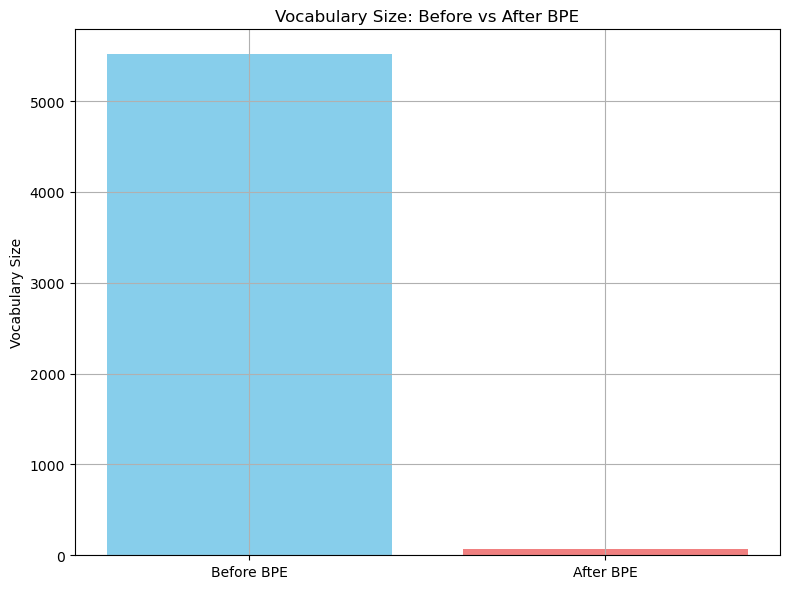

In [101]:
import matplotlib.pyplot as plt

text = gutenberg.raw('shakespeare-hamlet.txt')

tokens = word_tokenize(text)

before_vocab_size = len(set(tokens))  # Unique tokens
print(f"Vocabulary size before BPE: {before_vocab_size}")

bpe_tokens = []
for token in tokens:
    
    bpe_tokens.extend(list(token))

# Calculate the vocabulary size after BPE
after_vocab_size = len(set(bpe_tokens))  
print(f"Vocabulary size after BPE: {after_vocab_size}")

def plot_vocab_comparison(before_vocab_size, after_vocab_size):
    labels = ['Before BPE', 'After BPE']
    sizes = [before_vocab_size, after_vocab_size]
    
    plt.figure(figsize=(8, 6))
    plt.bar(labels, sizes, color=['skyblue', 'lightcoral'])
    plt.title('Vocabulary Size: Before vs After BPE')
    plt.ylabel('Vocabulary Size')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_vocab_comparison(before_vocab_size, after_vocab_size)


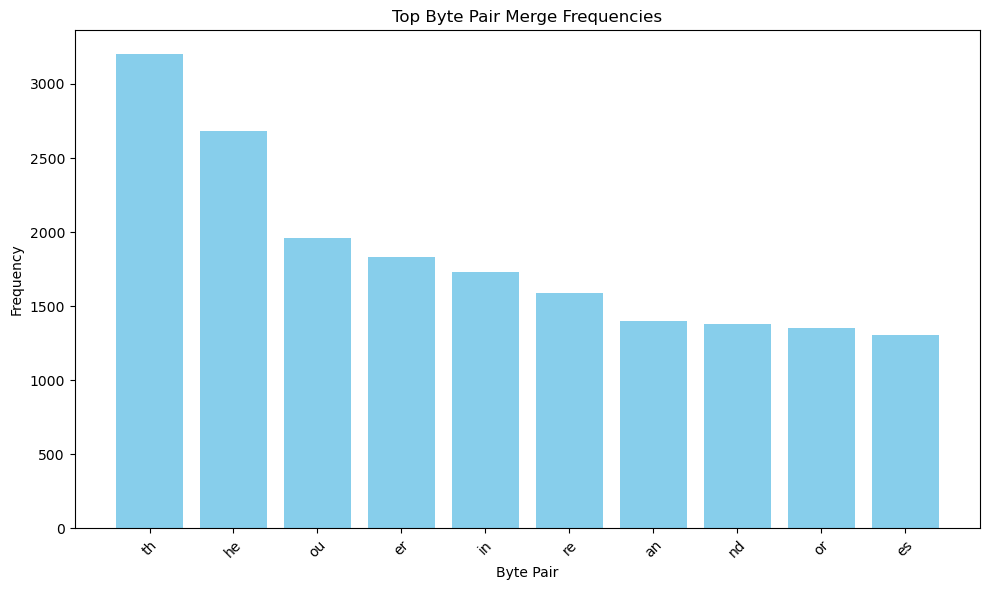

In [117]:

text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

tokens = nltk.word_tokenize(text)

def get_byte_pair_frequencies(tokens):
    pair_freq = defaultdict(int)
    
    
    for word in tokens:
        for i in range(len(word) - 1):
            pair = (word[i], word[i + 1])  
            pair_freq[pair] += 1
    
    return pair_freq

# Get the frequencies of adjacent character pairs (this is for demonstration)
pair_frequencies = get_byte_pair_frequencies(tokens)

# Sort the pairs by frequency
sorted_pairs = sorted(pair_frequencies.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 frequent pairs (for visualization purposes)
top_pairs = sorted_pairs[:10]

merge_frequencies = dict(top_pairs)

def plot_merge_frequencies(merge_frequencies):
    """
    Plots the frequencies of byte pair merges.
    
    merge_frequencies: A dictionary of (pair, frequency) where pair is a tuple (char1, char2)
    """
    pairs = list(merge_frequencies.keys())
    frequencies = list(merge_frequencies.values())
    
    # Convert pairs to strings for better visualization 
    pair_strings = [''.join(pair) for pair in pairs]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(pair_strings, frequencies, color='skyblue')
    plt.title('Top Byte Pair Merge Frequencies')
    plt.xlabel('Byte Pair')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_merge_frequencies(merge_frequencies)

